## Problem Statement: To predict the airline passenger's ticket sales
 

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
air = pd.read_excel("Airlines+Data.xlsx")
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## EDA

In [3]:
# Checking the basic information
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
# Checking the basic statistics
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Checking Duplicated

In [5]:
air[air.duplicated()]

,Month,Passengers


## Visualization

### Basic visualization to identify the past trend and perform analytics on the dataset

<AxesSubplot:ylabel='Passengers'>

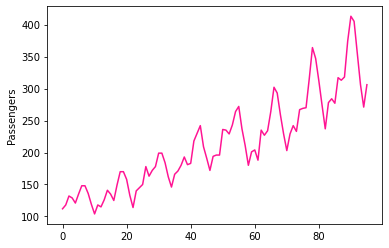

In [6]:
sns.lineplot(data=air["Passengers"],color="deeppink")

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

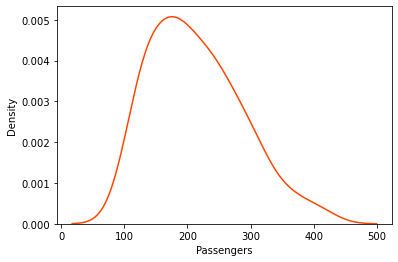

In [7]:
sns.kdeplot(data=air["Passengers"],color="orangered")

<AxesSubplot:ylabel='Frequency'>

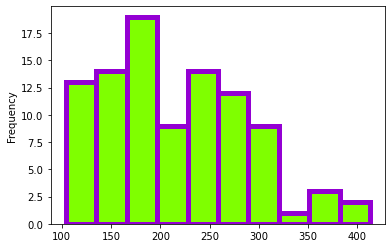

In [8]:
air["Passengers"].plot(kind="hist",color="chartreuse",linewidth=5,edgecolor="darkviolet")

In [9]:
temp=pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True,squeeze=True)
temp

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

## Boxplot to check the outliers 

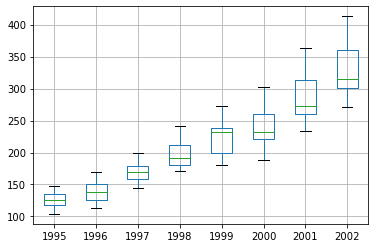

In [10]:
group=temp.groupby(pd.Grouper(freq="A"))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()    

## Lag plot - plot between lagges values of airline passengers and lagged time

In [11]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

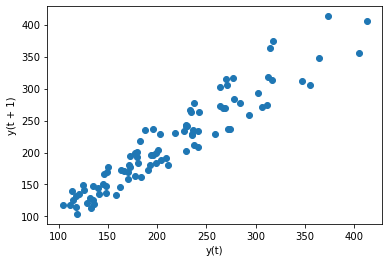

In [12]:
lag_plot(temp)

## Data driven methods

In [13]:
# splitting the dataset for train and  test 
train = air.head(77)
test = air.tail(19)

In [14]:
train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
72,2001-01-01,242
73,2001-02-01,233
74,2001-03-01,267
75,2001-04-01,269


In [15]:
test

,Month,Passengers
77,2001-06-01,315
78,2001-07-01,364
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317


## Moving Average and time decomposition plot

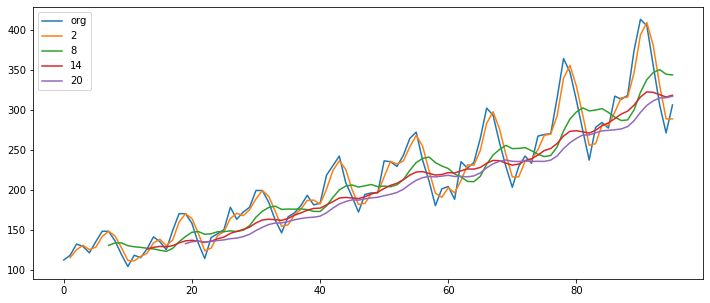

In [16]:
plt.figure(figsize=(12,5))
air["Passengers"].plot(label="org")
for i in range(2,24,6):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

## Seasonal Decompose

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

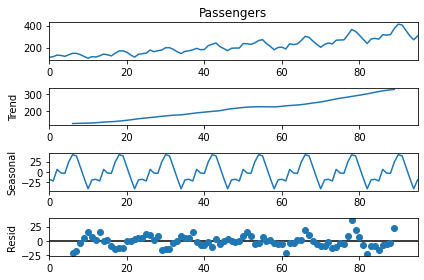

In [18]:
decompose_ts_add = seasonal_decompose(air["Passengers"],period=12)
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots-To identify the significant features that contribute to forcast

In [19]:
import statsmodels.graphics.tsaplots as tsa_plots

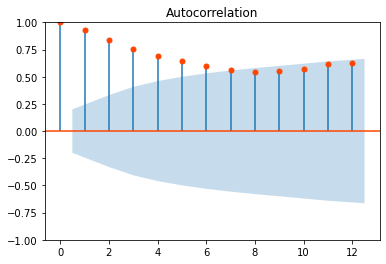

In [20]:
tsa_plots.plot_acf(air["Passengers"],lags=12,color="orangered")
plt.show()

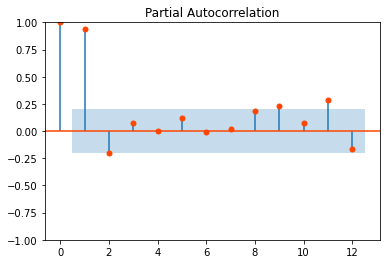

In [21]:
tsa_plots.plot_pacf(air["Passengers"],lags=12,color="orangered")
plt.show()

In [22]:
# Creating a user defined function - to calculate the RMSE value
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

## Developing a data driven models



## 1) Simple Exponential method 

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES

In [24]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start = test.index[0],end = test.index[-1])
r1 = RMSE(pred_ses,test["Passengers"])
r1

80.54332901444145

## 2) Holt's Model

In [25]:
from statsmodels.tsa.holtwinters import Holt # Holt Exponential Smoothing

In [26]:
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw=hw_model.predict(start=test.index[0],end = test.index[-1])
r2=RMSE(pred_hw,test["Passengers"])
r2

47.877728640304106

## Holts Exponential smoothing

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## 3) Holts winter exponential smoothing with additive seasonality and addictive trend

In [28]:
hwe_model_add_add= ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()# add the trend to the model
pred_hwe_add_add=hwe_model_add_add.predict(start = test.index[0],end =test.index[-1])
r3 = RMSE(pred_hwe_add_add,test["Passengers"])
r3

35.90542100780863

## 4) Holts winter exponential smoothing with mutliplicative seasonality and addictive trend

In [29]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"], seasonal="mul", trend="add", seasonal_periods=12).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start = test.index[0], end = test.index[-1])
r4 = RMSE(pred_hwe_mul_add,test["Passengers"])
r4

30.90647597585762

## Consolidating the results of all methods into a table

In [30]:
a ={"MODEL":["Simple Exponential","Holts Model", "Holts-add_seasn,add_trend ","Holts-mul_seasn,add_trend "],
    "RMSE":[r1,r2,r3,r4]}
ar=pd.DataFrame(a)
ar

,MODEL,RMSE
0,Simple Exponential,80.543329
1,Holts Model,47.877729
2,"Holts-add_seasn,add_trend",35.905421
3,"Holts-mul_seasn,add_trend",30.906476


In [31]:
# Combining train and test dataset for final model
final_model=ExponentialSmoothing(air["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

## Forcasting for next 15 time periods

In [32]:
final_model.forecast(15)

96     312.900086
97     308.172536
98     355.534687
99     345.772189
100    345.698870
101    392.474320
102    436.505456
103    429.863376
104    380.176787
105    332.321130
106    290.629463
107    330.595049
108    337.375645
109    332.122184
110    382.987297
dtype: float64

## Inference:

### From the above models, the model with the lowest RMSE value is holt winter exponential smoothing with multiplicative seasonality and additive trend. Thus, we use it to forecast the airlines passengers using the same model 

## ======================================================================================